In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [255]:
data = pd.read_excel('copia_base_datos_unificada_parquesdecastilla.xlsx')

dataset = data.iloc[:,0:32]

#print(dataset.info())

print(dataset['Etapa del Ciclo'].unique())
print(dataset['Probabilidad'].unique())
print(dataset['Autorización'].unique())
print(dataset['Fuente de Ubicación'].unique())

['Prospecto' 'Entrega de Tarjeta de Encargo Fiduciario']
[0.1  0.5  0.25]
['Pendiente' 'Cliente Autorizado' 'Cliente no Autoriza'
 'Revoca Autorización']
['LA GUIA WEB' 'VALLAS' 'VECINO SECTOR' 'FACEBOOK' 'Pagina Web'
 'REFERIDO COMPRADOR' 'PASO POR SALA DE VENTAS' 'VIVENDO WEB'
 'VISITA EMPRESARIAL' 'VIVENDO' 'REFERIDO FNA' 'REFERIDO CAJA' 'Referido'
 'INTERNET' 'Facebook' 'GOOGLE' 'OFICINA' 'REVISTA LAZOS'
 'VISITA empresarial impadoc' 'FERIA Abril 2017' 'FINCARAIZ - LA GUIA'
 'REFERIDO' 'FERIA Camacol sept 2017' 'DAVIVIENDA' 'VOLANTEO']


In [256]:
#dataset.info(10)
#dataset.isnull().sum()

In [257]:
#to eliminate rwos where name is NULL
#dataset = dataset[dataset['Nombre del Cliente'].notnull()]

# replacing na values in names with "No name" 
dataset["Nombre del Cliente"].fillna("No Name", inplace = True) 

# replacing na values in gender
dataset["Género"].fillna("No Gender reported", inplace = True) 

# replacing na values in tipo de comprador
#dataset["Tipo de comprador"].fillna("No reporta", inplace = True) 

# replacing na values in city
dataset["Ciudad"].fillna("No city", inplace = True) 

# replacing na values in tipo de comprador
dataset["Tipo de Acción"].fillna("No reporta", inplace = True) 

In [258]:
#standar answers
dataset.loc[dataset['Fuente de Ubicación'].str.contains('facebook', case=False), 'Fuente de Ubicación'] = 'FACEBOOK'
dataset.loc[dataset['Fuente de Ubicación'].str.contains('google|internet', case=False), 'Fuente de Ubicación'] = 'INTERNET'
dataset.loc[dataset['Fuente de Ubicación'].str.contains('referido', case=False), 'Fuente de Ubicación'] = 'REFERIDO'

print(dataset['Fuente de Ubicación'].nunique())

19


In [259]:
dataset.isnull().sum()

Proyecto                              0
Módulo                                0
Vendedor                              0
Identificacion                     1929
Género                                0
Nombre del Cliente                    0
Teléfono                           1894
Celular                              86
Correo                              207
Estado Civil                       1929
Ocupacion                          1931
Direccion Residencia               1931
Barrio                             1931
Fecha de Nacimiento                1932
Edad                               1932
Profesion                          1932
Tipo de comprador                  1153
Ciclo de Venta                        0
Etapa del Ciclo                       0
Probabilidad                          0
Valor                                 0
Ciudad                                0
Fecha de Creación (DD MM YYYY)        0
Se Crea Cotizacion                    0
Registro Visita a la Sala             0


In [260]:


#=====================================================================
#conversion rate:
#total of autoriced clients/total of people how recieves the campaing
#====================================================================

def retention_rate(dataframe, column_names):
    # Group by column_names and calculate retention
    retained = dataframe[dataframe['Autorización'] == 'Cliente Autorizado']\
        .groupby(column_names)['Nombre del Cliente'].count()
        #idealto have an user id in thtat case: ['user_id'].nunique()
   
    # Group by column_names and calculate conversion base on people status? probability
    #converted = dataframe[dataframe['Probabilidad'] == '50%'].groupby(column_names)['Nombre del Cliente'].count()
    
    #count total leads
    total = dataframe['Nombre del Cliente'].count()

    retention_rate = retained/total

    return retention_rate

#=====================================================================
#conversion rate:
#total of autoriced clients/total of people how recieves the campaing
#====================================================================

def filter_by_probability(dataframe, column_names):
    
    # Group by column_names and calculate conversion base on people status? probability
    best_leads = dataframe[dataframe['Probabilidad'] == '50%'].groupby(column_names)['Nombre del Cliente'].count()

    return best_leads


#==================================
#plotting function
#==================================

def plotting(dataframe, a,r): 
    dataframe.plot(kind='bar',figsize=(10,8))   
    plt.style.use('seaborn-dark-palette')
    plt.title(a,fontsize='15')
    plt.xlabel('¿' + dataframe.index.name + '?',fontsize='12')
    plt.ylabel('Leads',fontsize='12')
    plt.legend(loc='upper left', labels=dataframe.columns.values,fontsize='8')
    plt.grid()
    plt.xticks(rotation=r)
    plt.show()
    
    
#==================================
#plotting function
#==================================

def plotting_rate(dataframe, a,tipo,r): 
    dataframe.plot(kind=tipo,figsize=(10,8))   
    plt.style.use('seaborn-dark-palette')
    plt.title(a,fontsize='15')
    plt.xlabel('¿' + dataframe.index.name + '?',fontsize='12')
    plt.ylabel('Retention rate (%)',fontsize='12')
    plt.legend(loc='upper right', labels=dataframe.columns.values,fontsize='8')
    plt.grid()
    plt.xticks(rotation=r)
    plt.show()
    
#==================================
#plotting rates: individual graphs
#==================================

def plot_ind(dataframe,r): 
    for column in dataframe:
        #plt.figure(figsize=(10,8))
        plt.plot(dataframe.index, dataframe[column])   
        plt.style.use('seaborn-dark-palette')
        plt.title('Montly' + column + 'retention rate\n',fontsize='15')
        #plt.xlabel('¿' + dataframe.index.name + '?',fontsize='12')
        plt.xlabel('Date', fontsize='12')
        plt.ylabel('Retention rate (%)',fontsize='12')
        #plt.legend(loc='upper right', labels=dataframe.columns.values,fontsize='12')
        plt.grid()
        #plt.xticks(rotation=r)
        plt.show()
    


# Dates

In [261]:
dataset['Fecha de Creación (DD MM YYYY)'] = pd.to_datetime(dataset['Fecha de Creación (DD MM YYYY)'])
dataset['Primer Seguimiento (DD MM YYYY)'] = pd.to_datetime(dataset['Primer Seguimiento (DD MM YYYY)'])
dataset['Ultimo Seguimiento (DD MM YYYY)'] = pd.to_datetime(dataset['Ultimo Seguimiento (DD MM YYYY)'])

#creating columns with specific date times
dataset['Mes primer seguimiento'] = dataset['Primer Seguimiento (DD MM YYYY)'].dt.month 
dataset['Mes creación'] = dataset['Fecha de Creación (DD MM YYYY)'].dt.month 

#month and year

dataset['mes_año'] = dataset['Fecha de Creación (DD MM YYYY)'].dt.to_period('M')


# Analysis

In [262]:
#channel = dataset.groupby(['Fuente de Ubicación','Ciudad'])['Nombre del Cliente'].count()
channel = dataset.groupby(['Tipo de Acción','Ciudad'])['Nombre del Cliente'].count()
channel = pd.DataFrame(channel.unstack(level=1)) #unstack cities

#print(channel)

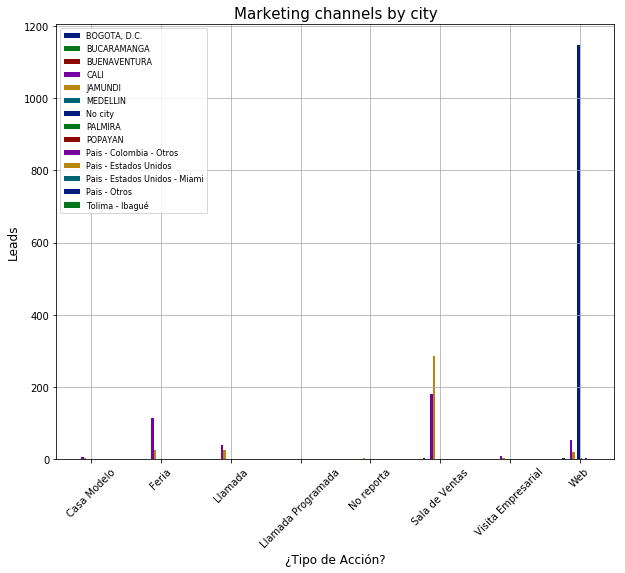

In [263]:
plotting(channel,"Marketing channels by city",45)

In [264]:
#date_channel = dataset.groupby(['Fecha de Creación (DD MM YYYY)','Fuente de Ubicación'])['Nombre del Cliente'].count()
date_channel = dataset.groupby(['mes_año','Tipo de Acción'])['Nombre del Cliente'].count()
date_channel = pd.DataFrame(date_channel.unstack(level=1)) #unstack channels

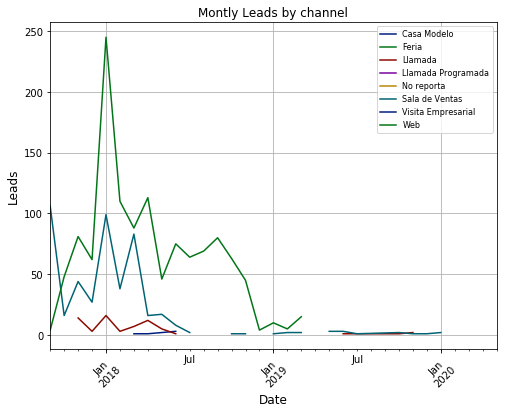

In [265]:
date_channel.plot(kind = 'line',figsize=(8,6))
plt.title('Montly Leads by channel')
plt.grid()
plt.xlabel('Date',fontsize='12')
plt.ylabel('Leads',fontsize='12')
plt.legend(loc='upper right', labels=date_channel.columns.values,fontsize='8')
plt.xticks(rotation=45)
plt.show()

In [266]:
channel_tipocomprador = dataset.groupby(['Fuente de Ubicación','Tipo de comprador'])['Nombre del Cliente'].count()
#channel_tipocomprador = dataset[dataset['Probabilidad'] ==0.1].groupby(['Tipo de Acción','Tipo de comprador'])['Nombre del Cliente'].count()
channel_tipocomprador = pd.DataFrame(channel_tipocomprador.unstack(level=1)) #unstack cities

print(channel_tipocomprador)


Tipo de comprador           Familiar  Inversor
Fuente de Ubicación                           
DAVIVIENDA                       2.0       NaN
FACEBOOK                        35.0      10.0
FERIA Abril 2017                 NaN       1.0
FERIA Camacol sept 2017          NaN       1.0
FINCARAIZ - LA GUIA              4.0       2.0
INTERNET                        16.0       5.0
LA GUIA WEB                      8.0       NaN
OFICINA                          4.0       3.0
PASO POR SALA DE VENTAS         83.0      37.0
Pagina Web                       1.0       1.0
REFERIDO                       108.0      50.0
REVISTA LAZOS                    NaN       2.0
VALLAS                           9.0       5.0
VECINO SECTOR                   53.0      35.0
VISITA EMPRESARIAL              99.0       6.0
VISITA empresarial impadoc       9.0       NaN
VIVENDO                         66.0      32.0
VIVENDO WEB                     84.0      12.0
VOLANTEO                         1.0       NaN


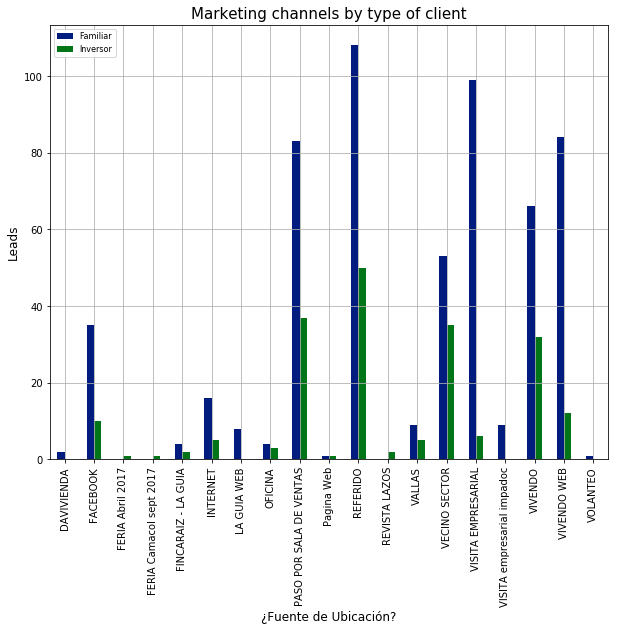

In [267]:
plotting(channel_tipocomprador,'Marketing channels by type of client',90)

In [268]:
city_tipocomprador = dataset.groupby(['Ciudad','Tipo de comprador'])['Nombre del Cliente'].count()
city_tipocomprador = pd.DataFrame(city_tipocomprador.unstack(level=1)) #unstack cities

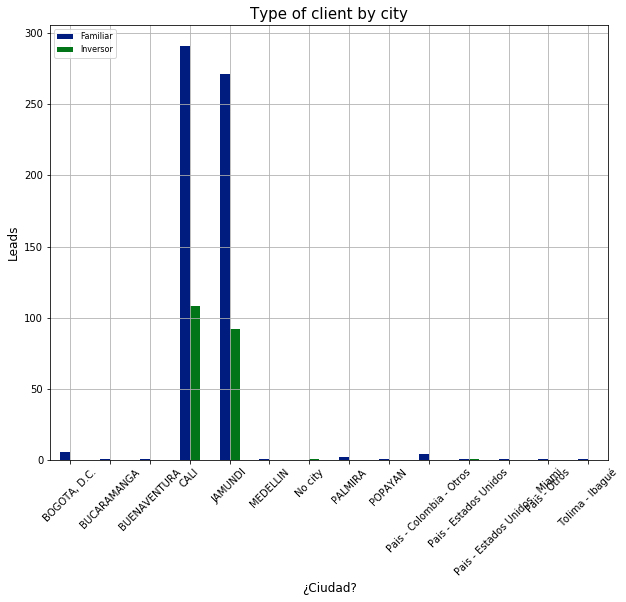

In [269]:
plotting(city_tipocomprador,"Type of client by city",45)


# Retention Rates

Tipo de comprador  Familiar  Inversor
Ciudad                               
CALI               0.001549       NaN
JAMUNDI            0.000516       NaN
No city                 NaN  0.000516


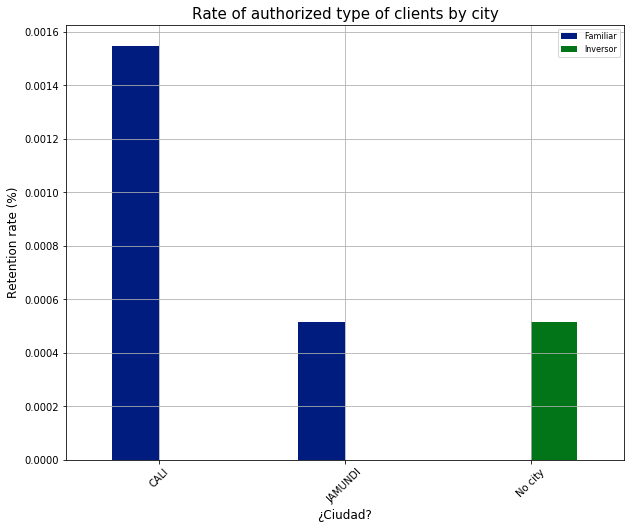

Tipo de comprador    Familiar  Inversor
Fuente de Ubicación                    
FACEBOOK             0.000516       NaN
Pagina Web           0.000516  0.000516
VECINO SECTOR        0.000516       NaN
VIVENDO              0.000516       NaN


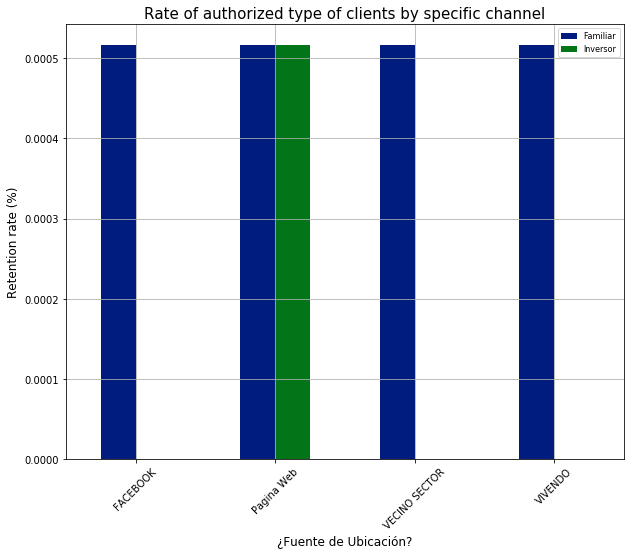

In [270]:
#=====================================================================
#retention rate:
#total of autoriced clients/total of people how recieves the campaing
#====================================================================
authorized_costomers_city_type = retention_rate(dataset, ['Ciudad','Tipo de comprador'])
#authorized_costomers_channel_type = retention_rate(dataset, ['Tipo de Acción','Tipo de comprador'])
authorized_costomers_channel_type = retention_rate(dataset, ['Fuente de Ubicación','Tipo de comprador'])

authorized_costomers_city_type = pd.DataFrame(authorized_costomers_city_type.unstack(level=1))
authorized_costomers_channel_type = pd.DataFrame(authorized_costomers_channel_type.unstack(level=1))

print(authorized_costomers_city_type)
plotting_rate(authorized_costomers_city_type,'Rate of authorized type of clients by city','bar',45)

print(authorized_costomers_channel_type)
plotting_rate(authorized_costomers_channel_type,'Rate of authorized type of clients by specific channel','bar',45)

Ciudad                   CALI   JAMUNDI
Fuente de Ubicación                    
FACEBOOK             0.001271       NaN
Pagina Web           0.003812  0.001271
VECINO SECTOR             NaN  0.001271
VIVENDO              0.001271       NaN


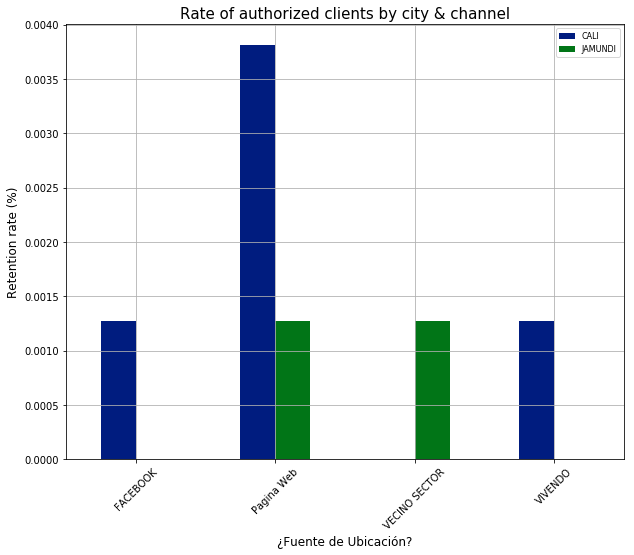

In [271]:
#=====================================================================
#total of autoriced clients/total of people how received the campaing
#====================================================================

data_only_cities = dataset[dataset['Ciudad'] != 'No city']
#authorized_clients_city_channel = retention_rate(data_only_cities, ['Ciudad','Tipo de Acción'])
authorized_clients_city_channel = retention_rate(data_only_cities, ['Ciudad','Fuente de Ubicación'])

authorized_clients_city_channel = pd.DataFrame(authorized_clients_city_channel.unstack(level=0))

print(authorized_clients_city_channel)
plotting_rate(authorized_clients_city_channel,'Rate of authorized clients by city & channel','bar',45)


año   Fuente de Ubicación
2017  FACEBOOK                 1
      Pagina Web             174
      VECINO SECTOR            1
2018  FACEBOOK                 1
      Pagina Web             847
      VIVENDO                  1
2019  Pagina Web              30
2020  Pagina Web               1
Name: Nombre del Cliente, dtype: int64


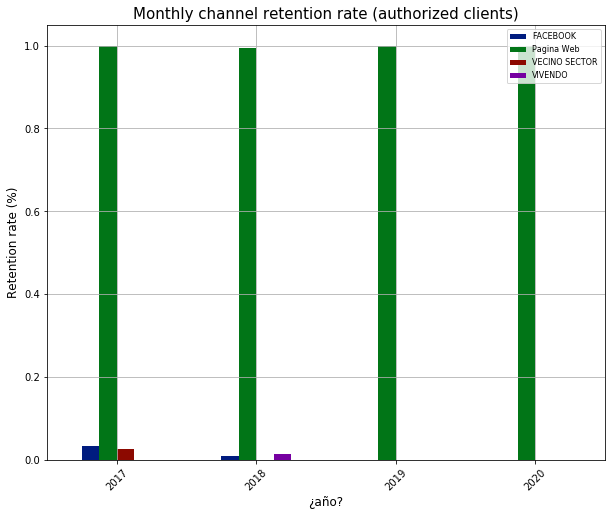

In [272]:
#=====================================================================
#total of autoriced clients/total of people who received the campaing
#====================================================================


dataset['año'] = dataset['mes_año'].dt.year 

#variables to group by
lsources = ['Tipo de Acción', 'Fuente de Ubicación']
ldate = ['año','mes_año']

#rates
total_bydate_authorized_clients_channel = dataset.groupby([ldate[0],lsources[1]])['Nombre del Cliente'].count()

daily_authorized_clients_channel = dataset[dataset['Autorización']=='Cliente Autorizado']\
                                   .groupby([ldate[0],lsources[1]])['Nombre del Cliente'].count()

daily_retention_rate = daily_authorized_clients_channel / total_bydate_authorized_clients_channel


daily_retention_rate = pd.DataFrame(daily_retention_rate.dropna().unstack(level=1))

#print(daily_retention_rate)
print(daily_authorized_clients_channel)
#plot_ind(daily_authorized_clients_channel,45)
plotting_rate(daily_retention_rate,"Monthly channel retention rate (authorized clients)",'bar',45)

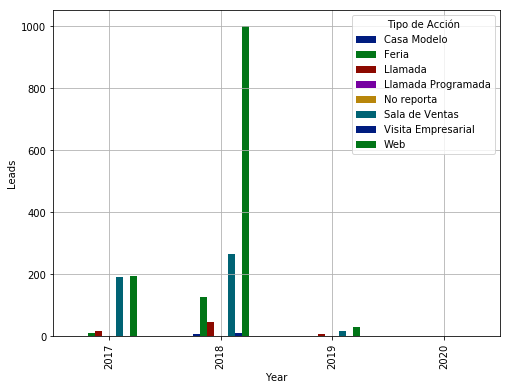

In [273]:
#sin filtrar por clientes autorizados
dataset.groupby(['año','Tipo de Acción'])['Nombre del Cliente'].count().unstack(level=1)\
                .plot(kind='bar',figsize=(8,6))
plt.ylabel('Leads')
plt.xlabel('Year')
plt.grid()
plt.show()

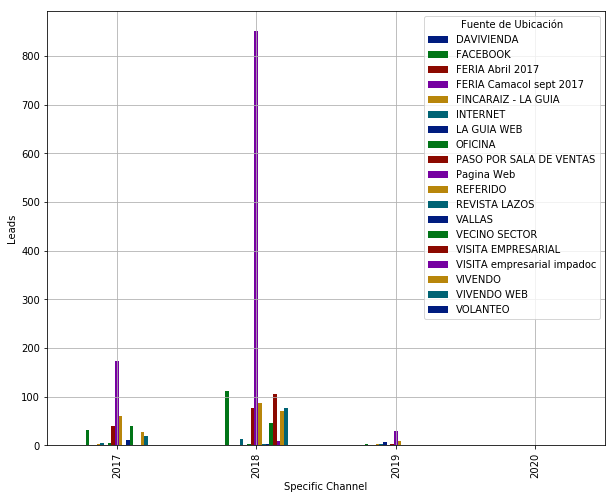

In [274]:
#sin filtrar por clientes autorizados
dataset.groupby(['año','Fuente de Ubicación'])['Nombre del Cliente'].count().dropna().unstack(level=1)\
                .plot(kind='bar',figsize=(10,8))
plt.ylabel('Leads')
plt.xlabel('Specific Channel')
#plt.xticks(rotation=45)
plt.grid()
plt.show()

In [275]:
test = dataset.groupby(['año','Tipo de Acción','Fuente de Ubicación'])['Nombre del Cliente'].count()

print(test)
#test = pd.DataFrame(test.unstack(level=0))
#test.plot(kind='bar',figsize=(10,8))
#plt.ylabel('Leads')
#plt.xlabel('Specific Channel')
#plt.xticks(rotation=45)
#plt.grid()
#plt.show()

año   Tipo de Acción      Fuente de Ubicación       
2017  Feria               FACEBOOK                        3
                          REFERIDO                        9
      Llamada             FACEBOOK                        8
                          INTERNET                        2
                          OFICINA                         1
                          VECINO SECTOR                   1
                          VIVENDO                         4
                          VOLANTEO                        1
      Llamada Programada  FACEBOOK                        1
      Sala de Ventas      DAVIVIENDA                      1
                          FACEBOOK                       18
                          FERIA Abril 2017                1
                          FERIA Camacol sept 2017         1
                          FINCARAIZ - LA GUIA             3
                          INTERNET                        3
                          OFICINA              